In [13]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
ds = pd.read_excel("C:/Users/Praveenn DJ/Desktop/OEE Forecast/oee percentage.xlsx",index_col="created_on", parse_dates=True)

In [3]:
ds.info()
ds

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2023-06-30 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   OEE     22 non-null     int64
dtypes: int64(1)
memory usage: 352.0 bytes


,OEE
created_on,
2023-06-30,52
2023-07-01,59
2023-07-02,84
2023-07-03,98
2023-07-04,93
2023-07-05,93
2023-07-06,94
2023-07-07,86
2023-07-08,87


<Axes: xlabel='created_on'>

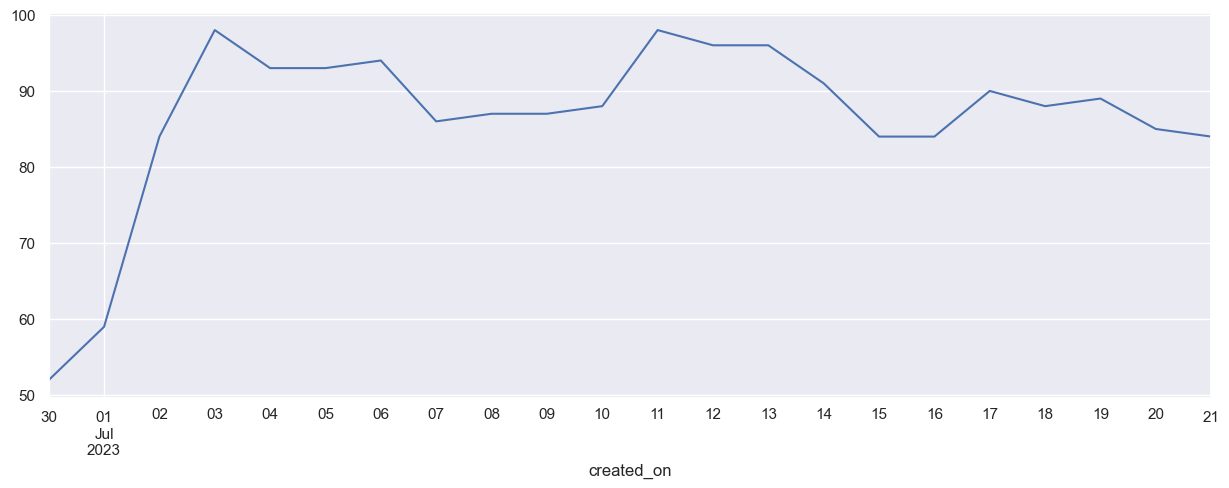

In [5]:
sns.set()
ds['OEE'].plot(figsize=(15,5))

In [6]:
X = ds["OEE"].values
result = adfuller(X)
print("\n\tADFT Statistics %f" % result[0])
print("\tp-value : %f" % result[1])
print('\tCritical values')
for key,value in result[4].items():
    print("\t\t%s : %.3f" %(key,value))
if result[1] < result[4]["5%"]:
          print("\tThe time series is non stationary")
else:
          print("\tThe time series is stationary")


	ADFT Statistics -1.416984
	p-value : 0.574107
	Critical values
		1% : -4.138
		5% : -3.155
		10% : -2.714
	The time series is stationary


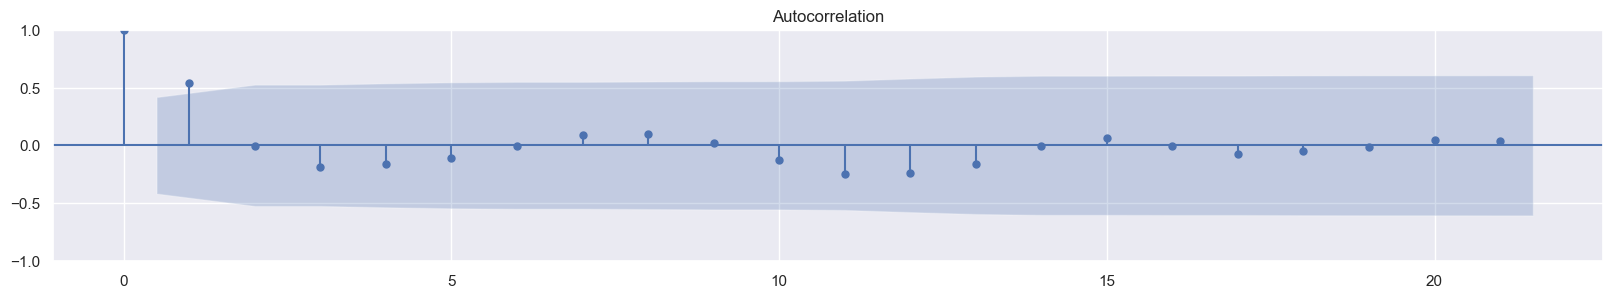

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(ds['OEE'],lags=21)
plt.rcParams["figure.figsize"] = (20,3)


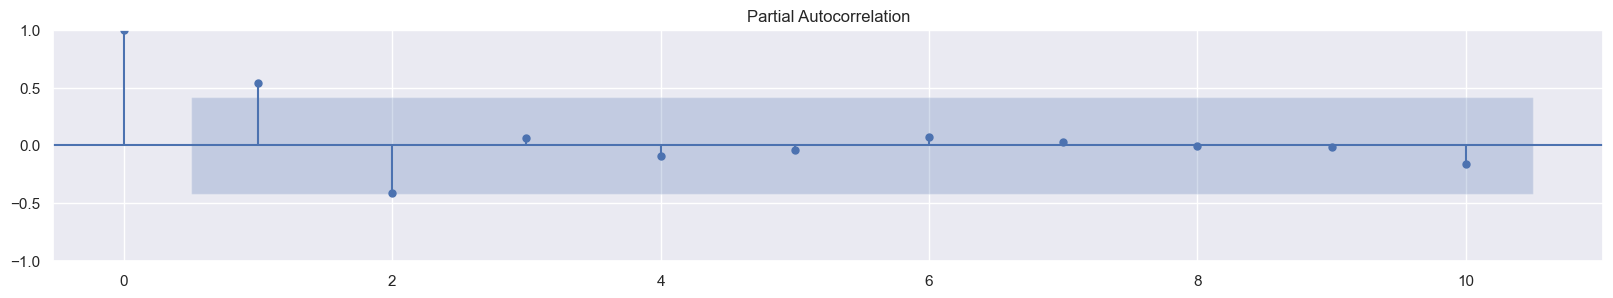

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(ds['OEE'],lags=10)
plt.rcParams["figure.figsize"] = (20,3)


In [11]:
print(ds.shape)
train = ds.iloc[:12]
test = ds.iloc[12:]
print(train.shape,test.shape)

(22, 1)
(12, 1) (10, 1)


In [14]:
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in range(1,11):
    for j in range(1,15):
        model = ARIMA(ds['OEE'],order=(i,0,j))
        model_fitted = model.fit()
        start=len(train)
        end=len(train)+len(test)-1
        predictions = model_fitted.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
        print("\n\tError calculation of the ARIMA Model of order (%d,0,%d)\n"%(i,j))
        mean = ds['OEE'].mean()
        print('\tMean of the test data of Dadra OEE %f'%mean)
        rmse = sqrt(mean_squared_error(predictions,test['OEE']))
        print('\tRooted mean square error %f'%rmse)
        avg_err = ((rmse/mean)*100)
        print("\tError Percentage %f \n"%avg_err)


	Error calculation of the ARIMA Model of order (1,0,1)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 4.160148
	Error Percentage 4.801850 


	Error calculation of the ARIMA Model of order (1,0,2)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 4.240240
	Error Percentage 4.894296 


	Error calculation of the ARIMA Model of order (1,0,3)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 3.848361
	Error Percentage 4.441970 


	Error calculation of the ARIMA Model of order (1,0,4)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 3.234409
	Error Percentage 3.733315 


	Error calculation of the ARIMA Model of order (1,0,5)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 3.672967
	Error Percentage 4.239522 


	Error calculation of the ARIMA Model of order (1,0,6)

	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 3.662523
	Error Percentage 4.227466 

In [15]:
from pandas.tseries.offsets import DateOffset
future_dates=[ds.index[-1] + DateOffset(days=x)for x in range(0,33)]
future_datest_ds = pd.DataFrame(index=future_dates[1:],columns=ds.columns)
future_ds=pd.concat([ds,future_datest_ds])
print(future_ds.shape)
print(future_ds)
cpy_future_ds = future_ds

(54, 1)
            OEE
2023-06-30   52
2023-07-01   59
2023-07-02   84
2023-07-03   98
2023-07-04   93
2023-07-05   93
2023-07-06   94
2023-07-07   86
2023-07-08   87
2023-07-09   87
2023-07-10   88
2023-07-11   98
2023-07-12   96
2023-07-13   96
2023-07-14   91
2023-07-15   84
2023-07-16   84
2023-07-17   90
2023-07-18   88
2023-07-19   89
2023-07-20   85
2023-07-21   84
2023-07-22  NaN
2023-07-23  NaN
2023-07-24  NaN
2023-07-25  NaN
2023-07-26  NaN
2023-07-27  NaN
2023-07-28  NaN
2023-07-29  NaN
2023-07-30  NaN
2023-07-31  NaN
2023-08-01  NaN
2023-08-02  NaN
2023-08-03  NaN
2023-08-04  NaN
2023-08-05  NaN
2023-08-06  NaN
2023-08-07  NaN
2023-08-08  NaN
2023-08-09  NaN
2023-08-10  NaN
2023-08-11  NaN
2023-08-12  NaN
2023-08-13  NaN
2023-08-14  NaN
2023-08-15  NaN
2023-08-16  NaN
2023-08-17  NaN
2023-08-18  NaN
2023-08-19  NaN
2023-08-20  NaN
2023-08-21  NaN
2023-08-22  NaN


In [16]:
forecast_model = ARIMA(future_ds['OEE'].astype(float),order=(10,0,14)).fit()

            OEE  predictions
2023-06-30   52          NaN
2023-07-01   59          NaN
2023-07-02   84          NaN
2023-07-03   98          NaN
2023-07-04   93          NaN
2023-07-05   93          NaN
2023-07-06   94          NaN
2023-07-07   86          NaN
2023-07-08   87          NaN
2023-07-09   87          NaN
2023-07-10   88          NaN
2023-07-11   98          NaN
2023-07-12   96    97.078297
2023-07-13   96    94.110056
2023-07-14   91    90.866588
2023-07-15   84    82.580051
2023-07-16   84    81.507602
2023-07-17   90    90.201958
2023-07-18   88    87.765426
2023-07-19   89    87.716719
2023-07-20   85    86.551641
2023-07-21   84    82.268180
2023-07-22  NaN    83.115051
2023-07-23  NaN    79.949180
2023-07-24  NaN    74.698760
2023-07-25  NaN    78.096627
2023-07-26  NaN    83.377362
2023-07-27  NaN    86.536371
2023-07-28  NaN    91.358398
2023-07-29  NaN    86.756602
2023-07-30  NaN    86.480407
2023-07-31  NaN    89.400013
2023-08-01  NaN    89.033520
2023-08-02  Na

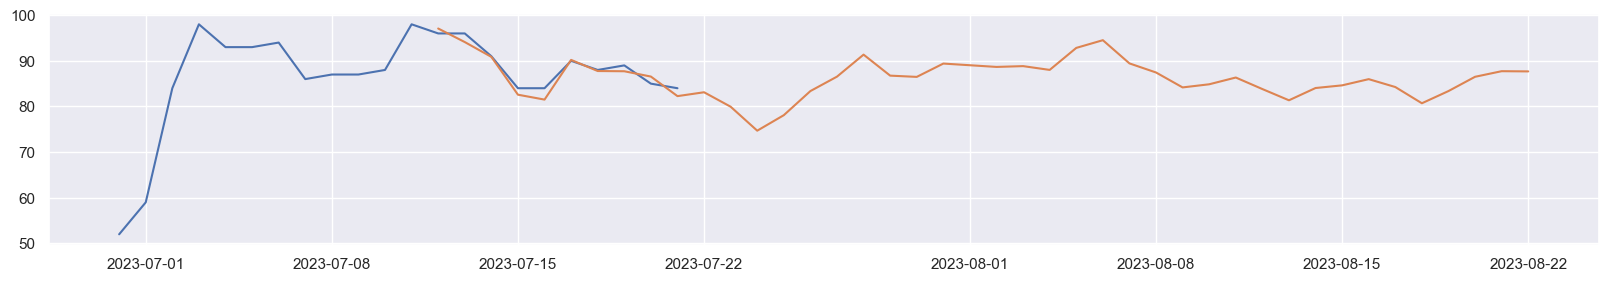

In [17]:
future_ds['predictions'] = forecast_model.predict(start = 12, end = 53, dynamic = True)
print(future_ds)
plt.plot(ds['OEE'],label='OEE')
plt.plot(future_ds['predictions'],label='Forecast')
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
p=10
q=14
model = ARIMA(ds['OEE'],order=(p,0,q))
model_fitted = model.fit()
print('\n\tThe AIC of the ARIMA Model of order (%d,0,%d) is %f'%(p,q,model_fitted.aic))
start=len(train)
end=len(train)+len(test)-1
predictions = model_fitted.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
mean = ds['OEE'].mean()
print('\tMean of the test data of Dadra OEE %f'%mean)
rmse = sqrt(mean_squared_error(predictions,test['OEE']))
print('\tRooted mean square error %f'%rmse)
avg_err = ((rmse/mean)*100)
print("\tError Percentage %f \n"%avg_err)
#plt.show()  
        


	The AIC of the ARIMA Model of order (10,0,14) is 182.763498
	Mean of the test data of Dadra OEE 86.636364
	Rooted mean square error 1.976536
	Error Percentage 2.281416 



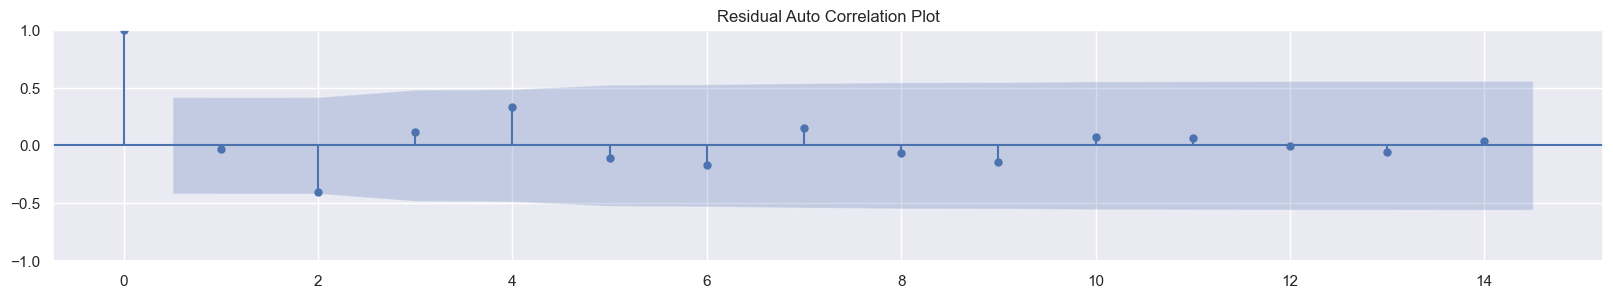

In [19]:
residuals = pd.DataFrame(forecast_model.resid)
fig = plot_acf(residuals.dropna(),title='Residual Auto Correlation Plot')
plt.show()

In [21]:
final_data = pd.DataFrame({'OEE' : future_ds['OEE'],'lower_conf_level': future_ds['predictions'] - 1.96*np.std(forecast_model.resid,ddof=1),
                          'predictions':future_ds['predictions'],'upper_conf_level':future_ds['predictions'] + 1.96*np.std(forecast_model.resid,ddof=1)})

            OEE  lower_conf_level  predictions  upper_conf_level
2023-06-30   52               NaN          NaN               NaN
2023-07-01   59               NaN          NaN               NaN
2023-07-02   84               NaN          NaN               NaN
2023-07-03   98               NaN          NaN               NaN
2023-07-04   93               NaN          NaN               NaN
2023-07-05   93               NaN          NaN               NaN
2023-07-06   94               NaN          NaN               NaN
2023-07-07   86               NaN          NaN               NaN
2023-07-08   87               NaN          NaN               NaN
2023-07-09   87               NaN          NaN               NaN
2023-07-10   88               NaN          NaN               NaN
2023-07-11   98               NaN          NaN               NaN
2023-07-12   96         79.759384    97.078297        114.397211
2023-07-13   96         76.791143    94.110056        111.428970
2023-07-14   91         7

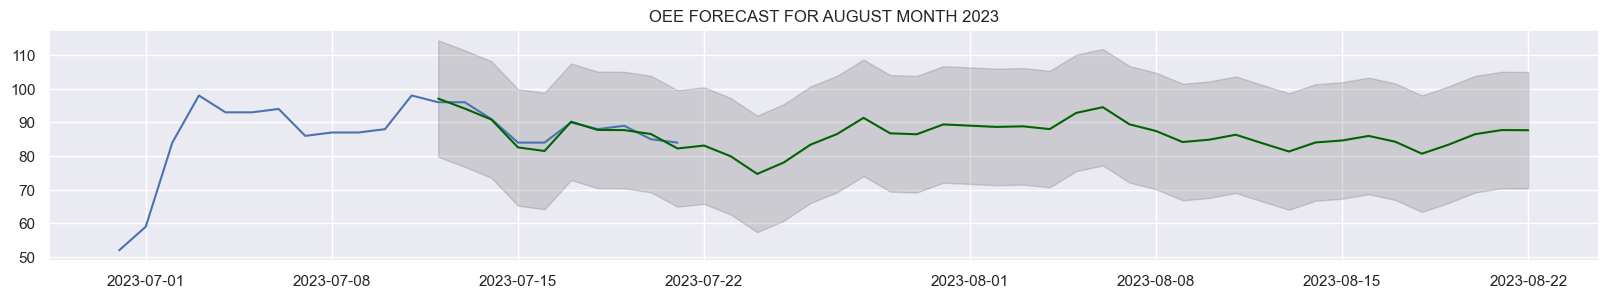

In [22]:
print(final_data)
plt.plot(ds['OEE'])
plt.plot(final_data.predictions, color='darkgreen')
plt.fill_between(final_data.index,final_data.lower_conf_level,final_data.upper_conf_level,color='k', alpha=.15)
plt.title("OEE FORECAST FOR AUGUST MONTH 2023")
plt.show()